# [R Cookbooks 2e Ch08](https://rc2e.com/probability)


In [1]:
library(rvest)

In [2]:
library(tidyverse)

── Attaching core tidyverse packages ────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.0     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.1.8
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ──────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()         masks stats::filter()
✖ readr::guess_encoding() masks rvest::guess_encoding()
✖ dplyr::lag()            masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


all_tables <-
  read_html('https://tradingeconomics.com/calendar') %>%
  html_table(fill = TRUE, header = FALSE)

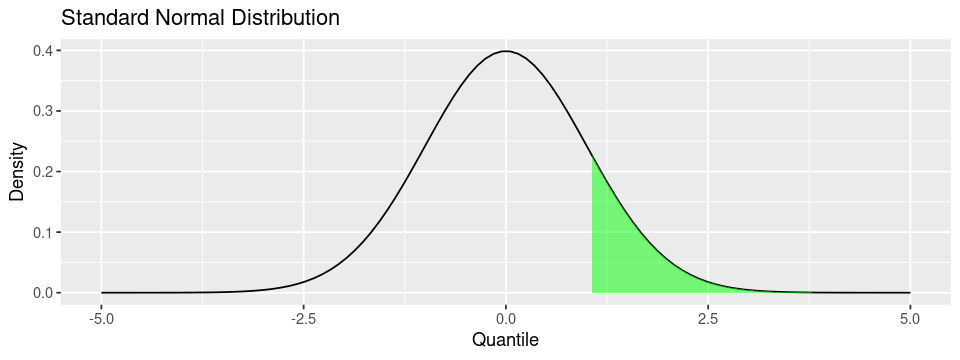

In [3]:
options(repr.plot.width=8, repr.plot.height=3)

df <- tibble(x=seq(-5,5,length.out = 100)) %>% 
mutate(y=dnorm(x))

df %>% 
ggplot(aes(x,y)) + geom_line() +   labs(
    title = "Standard Normal Distribution",
    y = "Density",
    x = "Quantile"
   ) + geom_ribbon(
    data = df%>% filter(x>1),
    aes(ymax = y), ymin = 0,
    fill = "green",
    colour = NA,
    alpha = 0.5    
)

In [17]:
quantile(df$x, c(.75,.95) )

75% 95% 
2.5 4.5

In [20]:
data(airquality)

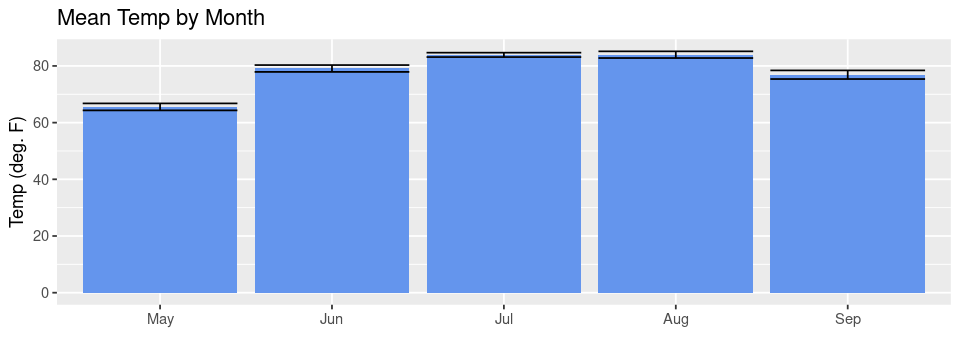

In [27]:
aq_data <- airquality %>%
  arrange(Month) %>%
  mutate(month_abb = fct_inorder(month.abb[Month]))

ggplot(aq_data, aes(month_abb, Temp)) +
  geom_bar(stat = "summary",
           fun = "mean",
           fill = "cornflowerblue") +
  stat_summary(fun.data = mean_se, geom = "errorbar") +
  labs(title = "Mean Temp by Month",
       x = "",
       y = "Temp (deg. F)")

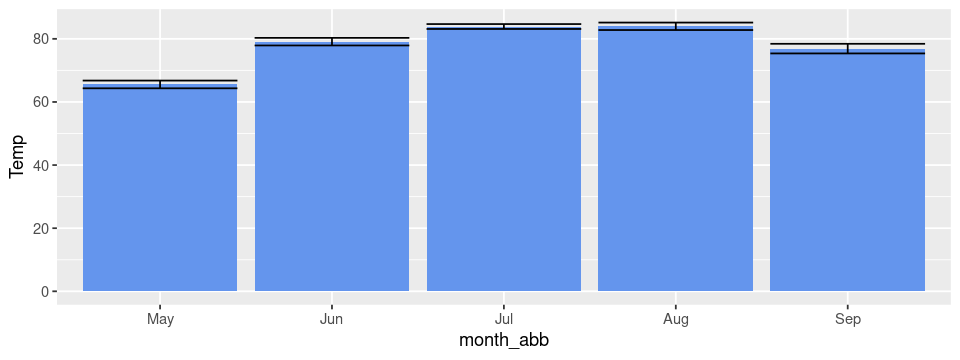

In [30]:
ggplot(aq_data, aes(month_abb, Temp)) +
  geom_bar(stat = "summary",
           fun = "mean",
           fill = "cornflowerblue") +
  geom_errorbar(stat = "summary", fun.data = mean_se,) 

In [34]:
#?geom_bar
?stat_count

geom_bar {ggplot2},R Documentation
mapping,"Set of aesthetic mappings created by aes(). If specified and inherit.aes = TRUE (the default), it is combined with the default mapping at the top level of the plot. You must supply mapping if there is no plot mapping."
data,"The data to be displayed in this layer. There are three options: If NULL, the default, the data is inherited from the plot data as specified in the call to ggplot(). A data.frame, or other object, will override the plot data. All objects will be fortified to produce a data frame. See fortify() for which variables will be created. A function will be called with a single argument, the plot data. The return value must be a data.frame, and will be used as the layer data. A function can be created from a formula (e.g. ~ head(.x, 10))."
position,"Position adjustment, either as a string naming the adjustment (e.g. ""jitter"" to use position_jitter), or the result of a call to a position adjustment function. Use the latter if you need to change the settings of the adjustment."
...,"Other arguments passed on to layer(). These are often aesthetics, used to set an aesthetic to a fixed value, like colour = ""red"" or size = 3. They may also be parameters to the paired geom/stat."
just,"Adjustment for column placement. Set to 0.5 by default, meaning that columns will be centered about axis breaks. Set to 0 or 1 to place columns to the left/right of axis breaks. Note that this argument may have unintended behaviour when used with alternative positions, e.g. position_dodge()."
width,"Bar width. By default, set to 90% of the resolution() of the data."
na.rm,"If FALSE, the default, missing values are removed with a warning. If TRUE, missing values are silently removed."
orientation,"The orientation of the layer. The default (NA) automatically determines the orientation from the aesthetic mapping. In the rare event that this fails it can be given explicitly by setting orientation to either ""x"" or ""y"". See the Orientation section for more detail."
show.legend,"logical. Should this layer be included in the legends? NA, the default, includes if any aesthetics are mapped. FALSE never includes, and TRUE always includes. It can also be a named logical vector to finely select the aesthetics to display."
inherit.aes,"If FALSE, overrides the default aesthetics, rather than combining with them. This is most useful for helper functions that define both data and aesthetics and shouldn't inherit behaviour from the default plot specification, e.g. borders()."
